# Analysis of survey 2565 (Beer survey)

In [1]:
import matplotlib
import pandas as pd

pd.options.display.max_columns = 50

%matplotlib inline

In [2]:
ideas = pd.read_csv('wikisurvey_2565_ideas_2016-12-14T20-42-29Z.csv')
votes = pd.read_csv('wikisurvey_2565_votes_2016-12-14T20-42-35Z.csv')
nonvotes = pd.read_csv('wikisurvey_2565_nonvotes_2016-12-14T20-42-38Z.csv')

In [3]:
ideas.head(1)

,Wikisurvey ID,Idea ID,Idea Text,Wins,Losses,Times involved in Cant Decide,Score,User Submitted,Session ID,Created at,Last Activity,Active,Appearances on Left,Appearances on Right,Info
0,2565,208020,Leffe (belgian blonde ale),11,1,1,85.7143,True,1429276,2012-07-11 23:22:19 UTC,2012-07-13 01:18:33 UTC,True,10,6,NaN


In [4]:
len(ideas)

27

In [5]:
len(votes)

1468

In [6]:
votes.head(1)

,Vote ID,Session ID,Wikisurvey ID,Winner ID,Winner Text,Loser ID,Loser Text,Prompt ID,Appearance ID,Left Choice ID,Right Choice ID,Created at,Updated at,Response Time (s),Missing Response Time Explanation,Valid,Hashed IP Address,URL Alias,User Agent,Referrer,Widget,Info
0,3833171,1427790,2565,207870,"New Belgium ""Mothership""",207873,"Sierra Nevada ""Summerfest""",10734722,5595219,207870,207873,2012-07-10 17:08:10 UTC,2012-07-10 17:08:10 UTC,4.386,NaN,True,749d8459047a7c024738d643524b889a,kingmanbeer,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4)...,http://www.allourideas.org/kingmanbeer/admin,False,NaN


In [7]:
len(votes['Session ID'].unique())

34

In [8]:
len(votes['Hashed IP Address'].unique())

17

In [9]:
len(votes['Winner ID'].unique())

27

In [10]:
len(votes['Loser ID'].unique())

27

In [11]:
votes.groupby('Hashed IP Address').count()['Vote ID']

Hashed IP Address
0cdd2260af00904baedc94baa0050fd6      25
1bc8052fc357986cea6bf530ff4d5d3a    1244
2dbd1556adf411f9e7482b3b6e583948       2
3088bafd05c8e6bcdf1526976dcf9e73       5
30b7051a71c04de302ca70134f9b3b92      23
3a5387a6c10e05c7f50c612244300d68       1
5c856391c9043cb3fcfe5fd5211746d6      28
66c5efe2df6c573bdca5a3da6061a40e      14
694111fea88bf644dde84986154e15d1      40
749d8459047a7c024738d643524b889a       1
a49c4042286d41731acea43e16613517      20
ad9061e6631e00074ceef389777695ca       9
b24bc7d11b9a91e35ec113f8bde91712       2
bb46446679ac2f7a52adb0d674f63a36      22
bef10d1c122228929e6c3e6dfeafca21       1
f933c71f15dfb64842fd9832e3734ad4       3
ffa0334a81819233f6253d1f50c7c3af      28
Name: Vote ID, dtype: int64

In [12]:
votes.groupby('Session ID').count()['Vote ID']

Session ID
1427790      1
1427820      3
1427821     25
1427832     14
1427837     23
1427844     28
1427897     28
1427909     12
1427938      2
1427981     10
1427991      5
1427999     40
1428000      8
1428008      1
1428015     10
1428029    650
1428157     35
1428219      9
1428233    105
1428252     20
1428263     24
1428328      7
1428407      9
1428480     50
1428482     63
1428483     81
1429276    126
1429315      5
1429380     14
1429427     13
1429443     22
1430202     22
1430273      1
1430878      2
Name: Vote ID, dtype: int64

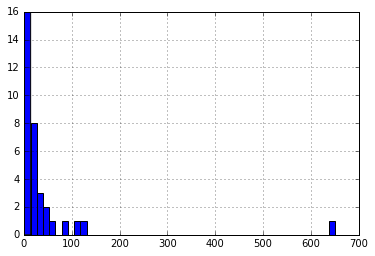

In [13]:
votes.groupby('Session ID').count()['Vote ID'].hist(bins=50)

In [14]:
data = votes[['Winner ID', 'Loser ID', 'Hashed IP Address']].copy()
data.head()

,Winner ID,Loser ID,Hashed IP Address
0,207870,207873,749d8459047a7c024738d643524b889a
1,207879,207888,0cdd2260af00904baedc94baa0050fd6
2,207887,207870,f933c71f15dfb64842fd9832e3734ad4
3,207879,207872,f933c71f15dfb64842fd9832e3734ad4
4,207877,207888,0cdd2260af00904baedc94baa0050fd6


In [15]:
data['value'] = (data['Winner ID'] > data['Loser ID']).apply(int)
data.head()

,Winner ID,Loser ID,Hashed IP Address,value
0,207870,207873,749d8459047a7c024738d643524b889a,0
1,207879,207888,0cdd2260af00904baedc94baa0050fd6,0
2,207887,207870,f933c71f15dfb64842fd9832e3734ad4,1
3,207879,207872,f933c71f15dfb64842fd9832e3734ad4,1
4,207877,207888,0cdd2260af00904baedc94baa0050fd6,0


In [16]:
data['bigIndex'] = data[['Winner ID', 'Loser ID']].apply(max, axis=1)
data['smallIndex'] = data[['Winner ID', 'Loser ID']].apply(min, axis=1)
data.head()

,Winner ID,Loser ID,Hashed IP Address,value,bigIndex,smallIndex
0,207870,207873,749d8459047a7c024738d643524b889a,0,207873,207870
1,207879,207888,0cdd2260af00904baedc94baa0050fd6,0,207888,207879
2,207887,207870,f933c71f15dfb64842fd9832e3734ad4,1,207887,207870
3,207879,207872,f933c71f15dfb64842fd9832e3734ad4,1,207879,207872
4,207877,207888,0cdd2260af00904baedc94baa0050fd6,0,207888,207877


In [17]:
data['userId'] = data['Hashed IP Address']

In [18]:
# data['smallIndex'] -= data['smallIndex'].min()
# data['bigIndex'] -= data['bigIndex'].min()

In [19]:
item_map = {}
for i, item_id in enumerate(ideas['Idea ID'].sort_values()): 
    item_map[item_id] = i
    
text_map = {}
id_to_text = ideas.set_index('Idea ID')['Idea Text']
for i, item_id in enumerate(ideas['Idea ID']):
    text_map[i] = id_to_text[item_id]

In [20]:
pd.DataFrame.from_dict(item_map, orient='index').to_csv('2565_item_map.csv', header=False)

In [21]:
pd.DataFrame.from_dict(text_map, orient='index').to_csv('2565_text_map.csv', header=False)

In [22]:
for item in item_map:
    data.loc[data['smallIndex'] == item, 'smallIndex'] = item_map[item]
    data.loc[data['bigIndex'] == item, 'bigIndex'] = item_map[item]

In [23]:
data.head()

,Winner ID,Loser ID,Hashed IP Address,value,bigIndex,smallIndex,userId
0,207870,207873,749d8459047a7c024738d643524b889a,0,5,2,749d8459047a7c024738d643524b889a
1,207879,207888,0cdd2260af00904baedc94baa0050fd6,0,20,11,0cdd2260af00904baedc94baa0050fd6
2,207887,207870,f933c71f15dfb64842fd9832e3734ad4,1,19,2,f933c71f15dfb64842fd9832e3734ad4
3,207879,207872,f933c71f15dfb64842fd9832e3734ad4,1,11,4,f933c71f15dfb64842fd9832e3734ad4
4,207877,207888,0cdd2260af00904baedc94baa0050fd6,0,20,9,0cdd2260af00904baedc94baa0050fd6


In [24]:
data[['smallIndex', 'bigIndex', 'value', 'userId']].to_csv('2565_dat.csv', index=False, header=False)
pd.read_csv('2565_dat.csv', header=None)

,0,1,2,3
0,2,5,0,749d8459047a7c024738d643524b889a
1,11,20,0,0cdd2260af00904baedc94baa0050fd6
2,2,19,1,f933c71f15dfb64842fd9832e3734ad4
3,4,11,1,f933c71f15dfb64842fd9832e3734ad4
4,9,20,0,0cdd2260af00904baedc94baa0050fd6
5,10,16,1,0cdd2260af00904baedc94baa0050fd6
6,0,8,0,0cdd2260af00904baedc94baa0050fd6
7,5,6,1,0cdd2260af00904baedc94baa0050fd6
8,7,8,0,0cdd2260af00904baedc94baa0050fd6
9,0,20,0,0cdd2260af00904baedc94baa0050fd6
